### Import Libraries

In [119]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Data Gathering

In [44]:
train = pd.read_csv(r"C:\Users\soora\Downloads\Training.csv")
test =  pd.read_csv(r"C:\Users\soora\Downloads\Testing.csv")

In [45]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [46]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


### Data Cleaning

In [47]:
train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [48]:
train = train.drop('Unnamed: 133', axis=1)

In [49]:
train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [50]:
train.shape

(4920, 133)

In [51]:
test.shape

(42, 133)

In [52]:
train.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [53]:
train.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [54]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4915     True
4916     True
4917     True
4918     True
4919     True
Length: 4920, dtype: bool

In [55]:
# check if balanced
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

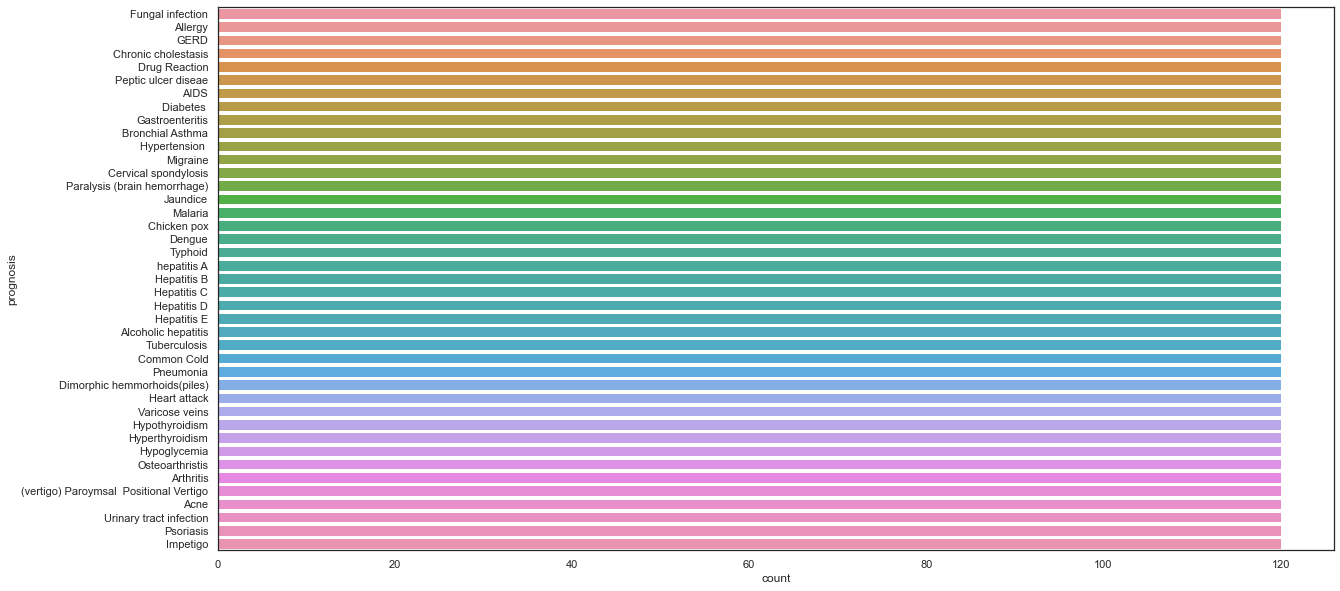

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(y=train['prognosis'])
plt.show()

### Train Test Split

In [56]:
A = train[["prognosis"]] # diseases 
B = train.drop(["prognosis"],axis=1) # symptoms 
C = test.drop(["prognosis"],axis=1) # symptoms - testing 
trainx, testx,trainy, testy = train_test_split(B,A,test_size=0.2)

### Apply Machine Learning Algorithms

### Random Forest

In [57]:
mod = RFC(n_estimators = 100,n_jobs = 5, criterion= 'entropy',random_state = 42)
mod = mod.fit(trainx,trainy.values.ravel())
pred = mod.predict(testx)

In [58]:
metrics.accuracy_score(testy, pred)


1.0

In [59]:
report = classification_report(testy, pred, output_dict=True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
(vertigo) Paroymsal Positional Vertigo,1.0,1.0,1.0,26.0
AIDS,1.0,1.0,1.0,23.0
Acne,1.0,1.0,1.0,28.0
Alcoholic hepatitis,1.0,1.0,1.0,25.0
Allergy,1.0,1.0,1.0,25.0
Arthritis,1.0,1.0,1.0,23.0
Bronchial Asthma,1.0,1.0,1.0,27.0
Cervical spondylosis,1.0,1.0,1.0,30.0
Chicken pox,1.0,1.0,1.0,14.0
Chronic cholestasis,1.0,1.0,1.0,22.0


In [60]:
cm = confusion_matrix(testy, pred)
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,23,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,14,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,22,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test = test.join(pd.DataFrame(mod.predict(C),columns=["predicted"]))[["prognosis","predicted"]]

test['result']= ' '
for i in range(len(test)):
    if test["prognosis"][i] == test["predicted"][i]:
        test['result'].iloc[i] = 'Correct'
    else:
        test['result'].iloc[i] = 'Incorrect'
test

,prognosis,predicted,result
0,Fungal infection,Fungal infection,Correct
1,Allergy,Allergy,Correct
2,GERD,GERD,Correct
3,Chronic cholestasis,Chronic cholestasis,Correct
4,Drug Reaction,Drug Reaction,Correct
5,Peptic ulcer diseae,Peptic ulcer diseae,Correct
6,AIDS,AIDS,Correct
7,Diabetes,Diabetes,Correct
8,Gastroenteritis,Gastroenteritis,Correct
9,Bronchial Asthma,Bronchial Asthma,Correct


[Text(0.7743046201508621, 0.9838709677419355, 'X[32] <= 0.5\nentropy = 5.347\nsamples = 2533\nvalue = [85, 87, 85, 97, 79, 116, 83, 92, 126, 93, 113\n101, 96, 107, 90, 94, 91, 87, 92, 105, 106, 82\n82, 80, 94, 91, 95, 108, 95, 95, 78, 92, 87, 111\n93, 115, 120, 95, 89, 101, 108]'),
 Text(0.6412816540948276, 0.9516129032258065, 'X[5] <= 0.5\nentropy = 5.091\nsamples = 2056\nvalue = [85, 87, 85, 3, 79, 116, 83, 92, 126, 2, 113, 101\n96, 107, 90, 94, 91, 87, 92, 5, 11, 2, 5, 80\n94, 91, 95, 108, 2, 95, 78, 92, 87, 111, 93, 115\n120, 95, 89, 101, 2]'),
 Text(0.5551926185344828, 0.9193548387096774, 'X[63] <= 0.5\nentropy = 4.832\nsamples = 1634\nvalue = [85, 87, 85, 3, 6, 116, 83, 92, 126, 2, 6, 5\n96, 107, 90, 94, 91, 87, 92, 5, 11, 2, 5, 80\n94, 91, 95, 108, 2, 6, 78, 92, 87, 111, 2, 115\n7, 0, 89, 101, 2]'),
 Text(0.49831627155172414, 0.8870967741935484, 'X[56] <= 0.5\nentropy = 4.742\nsamples = 1525\nvalue = [85, 87, 85, 3, 6, 116, 83, 5, 126, 2, 6, 5, 96\n107, 90, 94, 91, 87, 92, 5, 11

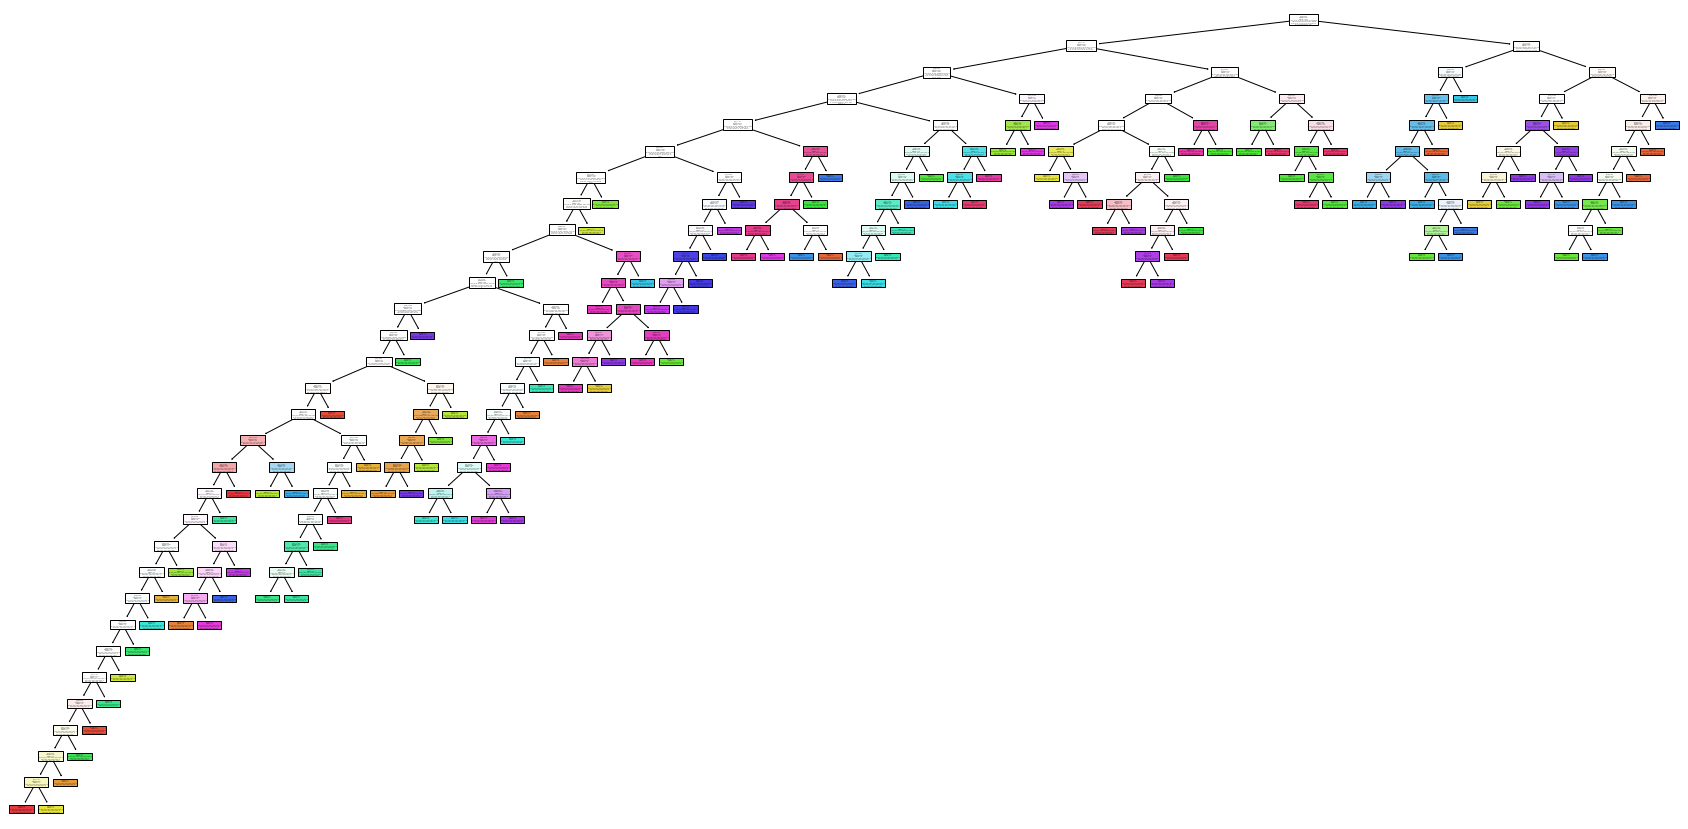

In [62]:
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(mod.estimators_[8],filled = True)

### Decision Tree

In [63]:
dt = DecisionTreeClassifier() 
clf = dt.fit(trainx,trainy)
pred = clf.predict(testx)
scores = cross_val_score(clf, testx,testy, cv=5)
print("for Decision Tree: ")
print(scores.mean())

for Decision Tree: 
0.9613695224282607


### Logistic Regression

In [122]:
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(trainx,trainy)

print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(trainx, trainy))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(testx, testy))

C:\Users\soora\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  1.0


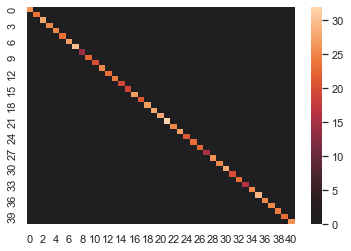

Confusion Matrix is
 [[26  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 23  0]
 [ 0  0  0 ...  0  0 26]]


In [124]:
predLR = LogisticRegressionModel.predict(testx)
CM_LR = confusion_matrix(testy, predLR)
sns.heatmap(CM_LR, center=True)
plt.show()
print('Confusion Matrix is\n', CM_LR)

In [131]:
print(classification_report(testy, predLR))
acc = metrics.accuracy_score(testy, predLR)
print(acc)

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        26
                                   AIDS       1.00      1.00      1.00        23
                                   Acne       1.00      1.00      1.00        28
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        25
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        14
                    Chronic cholestasis       1.00      1.00      1.00        22
                            Common Cold       1.00      1.00      1.00        20
                           

## Data visualization

In [64]:
[col for col in train.columns if train[col].sum()==0]

['fluid_overload']

In [65]:
[col for col in train.iloc[:,:-1].columns if train[col].sum() <= 50]

['fluid_overload']

In [66]:
def get_sub_dataframe(df:pd.DataFrame, prognosis:str) -> pd.DataFrame:
    val, fet = [],[]
    df_after_selection = df[df['prognosis']== prognosis ]
    val_df = df_after_selection.iloc[:,:-1]
    mat = [[val_df[i].sum(),i] for i in val_df.columns if val_df[i].sum()!=0]
    for i in mat:
        val.append(i[0])
        fet.append(i[1])
    data = {'fet': fet, 'val': val}
    data = pd.DataFrame.from_dict(data)
    return data

In [67]:
train['prognosis'].unique()[1]

'Allergy'

### Fungal Infection 

In [68]:
Fungal_infection = get_sub_dataframe(train, 'Fungal infection')
fet = list(Fungal_infection['fet'])
val = list(Fungal_infection['val'])

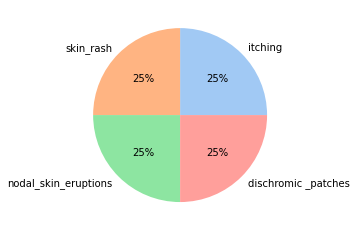

In [69]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='val', ylabel='fet'>

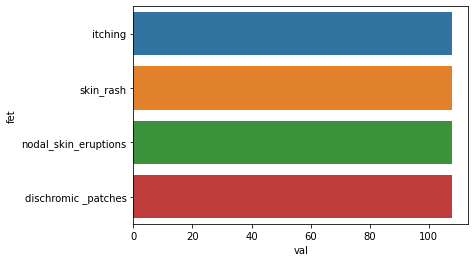

In [71]:
sns.barplot(data=Fungal_infection, x="val", y="fet")

### Allergy

In [72]:
Allergy = get_sub_dataframe(train, 'Allergy')
fet = list(Allergy['fet'])
val = list(Allergy['val'])

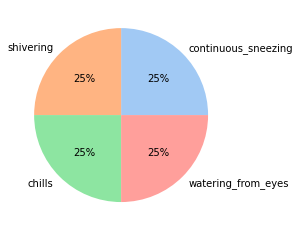

In [73]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()


<AxesSubplot:xlabel='val', ylabel='fet'>

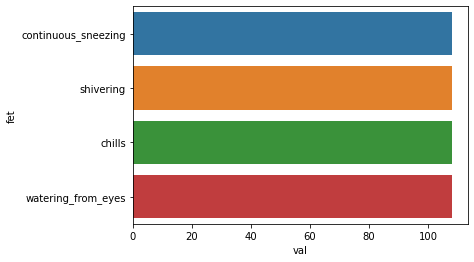

In [74]:
sns.barplot(data=Allergy, x="val", y="fet")

### GERD 

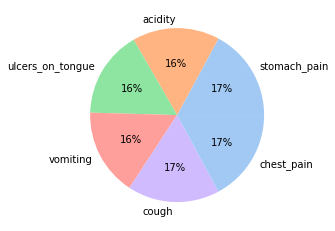

In [76]:
data = get_sub_dataframe(train, 'GERD')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

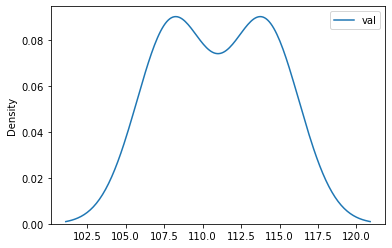

In [77]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

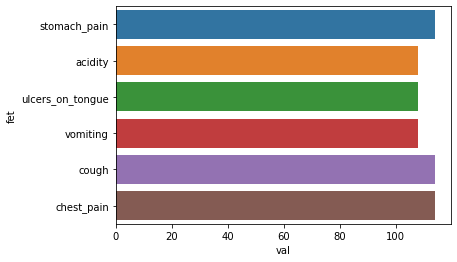

In [79]:
sns.barplot(data=data, x="val", y="fet")

### Chronic cholestasis

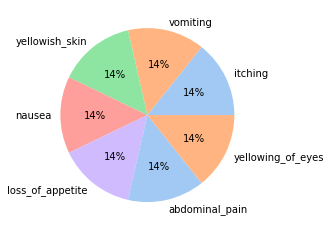

In [80]:
data = get_sub_dataframe(train, 'Chronic cholestasis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='val', ylabel='fet'>

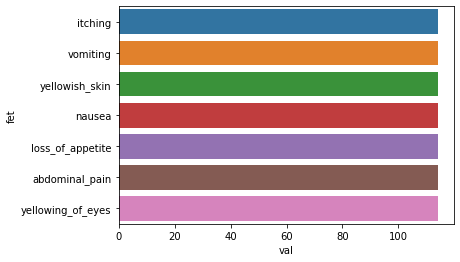

In [81]:
sns.barplot(data=data, x="val", y="fet")


### Drug Reaction 

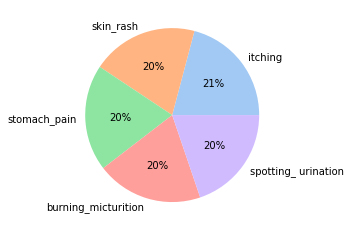

In [82]:
data = get_sub_dataframe(train, 'Drug Reaction')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

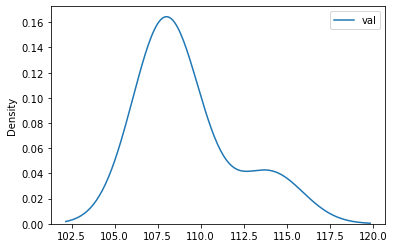

In [83]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

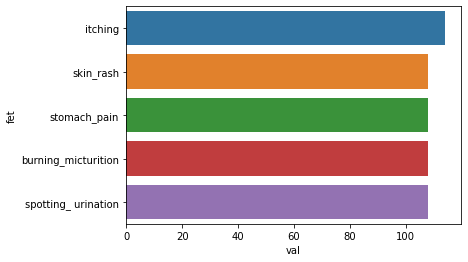

In [84]:
sns.barplot(data=data, x="val", y="fet")

### Peptic ulcer disease

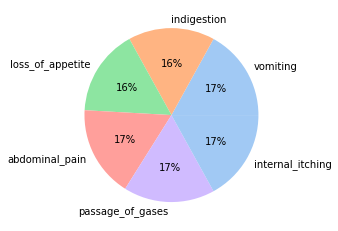

In [85]:
data = get_sub_dataframe(train, 'Peptic ulcer diseae')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

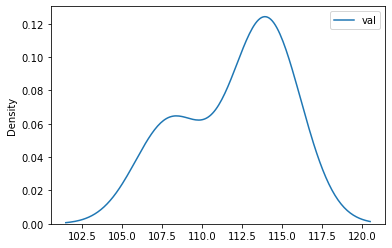

In [86]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

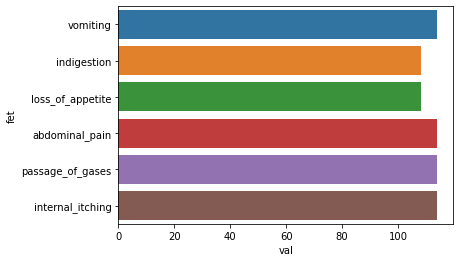

In [87]:
sns.barplot(data=data, x="val", y="fet")

### AIDS

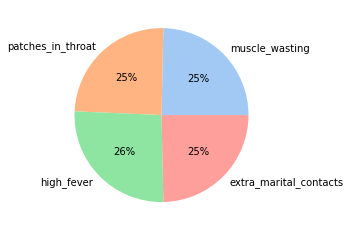

In [89]:
data = get_sub_dataframe(train, 'AIDS')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

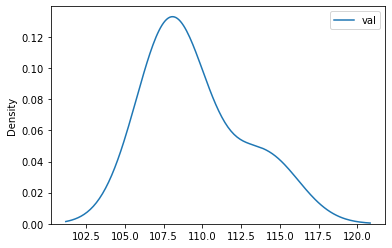

In [90]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

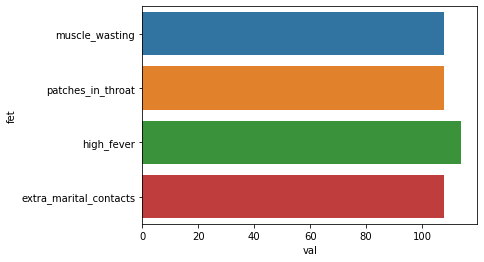

In [91]:
sns.barplot(data=data, x="val", y="fet")

### Diabetes

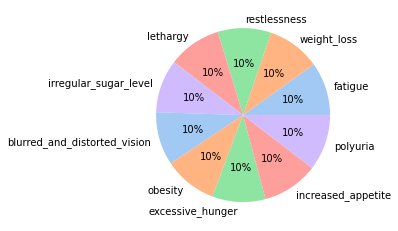

In [92]:
data = get_sub_dataframe(train, 'Diabetes ')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

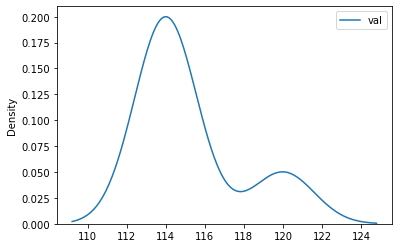

In [93]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

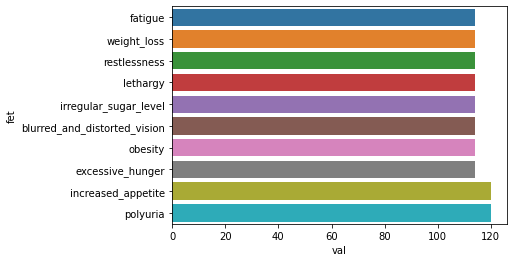

In [94]:
sns.barplot(data=data, x="val", y="fet")

### Gastroenteritis

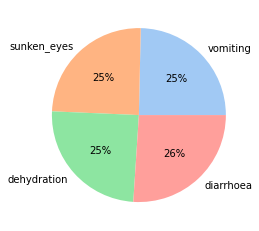

In [95]:
data = get_sub_dataframe(train, 'Gastroenteritis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

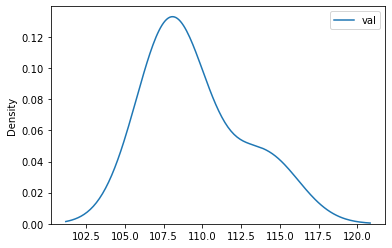

In [96]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

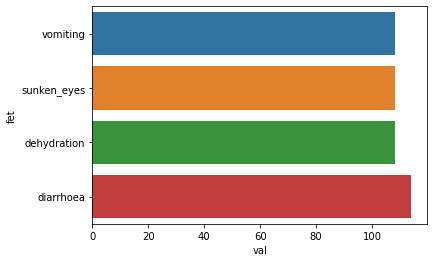

In [97]:
sns.barplot(data=data, x="val", y="fet")

### Bronchial Asthma

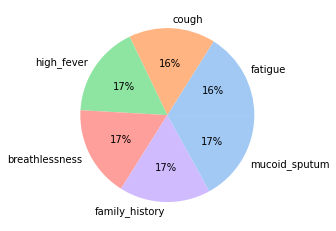

In [98]:
data = get_sub_dataframe(train, 'Bronchial Asthma')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

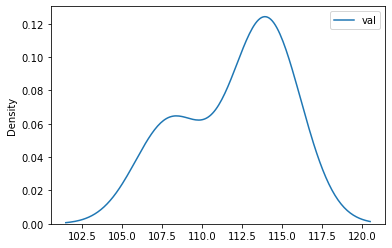

In [99]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

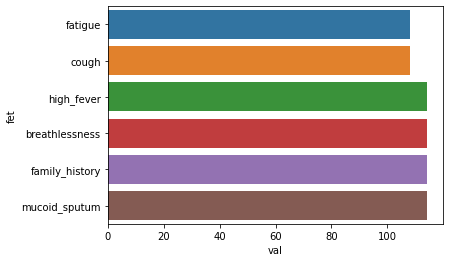

In [100]:
sns.barplot(data=data, x="val", y="fet")

### Hypertension 

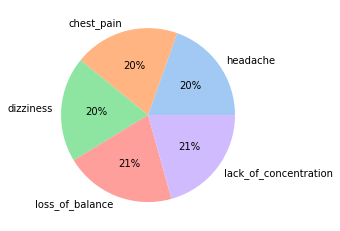

In [101]:
data = get_sub_dataframe(train, 'Hypertension ')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:ylabel='Density'>

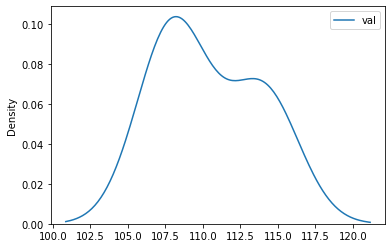

In [102]:
sns.kdeplot(data=data)

<AxesSubplot:xlabel='val', ylabel='fet'>

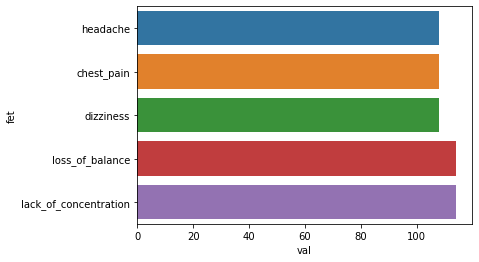

In [103]:
sns.barplot(data=data, x="val", y="fet")

### Migraine

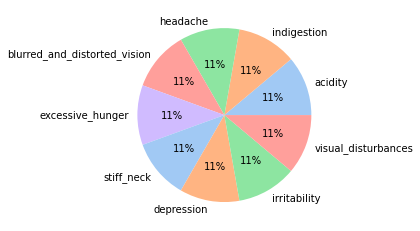

In [104]:
data = get_sub_dataframe(train, 'Migraine')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='val', ylabel='fet'>

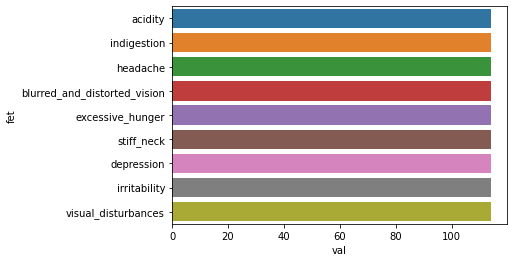

In [105]:
sns.barplot(data=data, x="val", y="fet")

### Cervical spondylosis

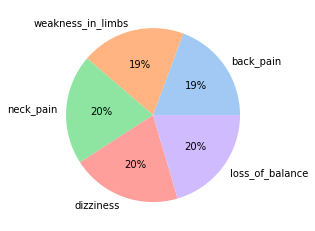

<AxesSubplot:ylabel='Density'>

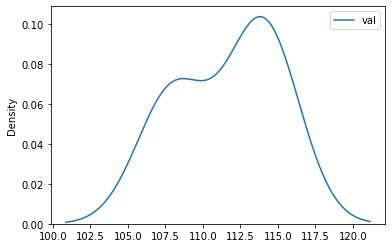

In [112]:
data = get_sub_dataframe(train, 'Cervical spondylosis')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.kdeplot(data=data)


<AxesSubplot:xlabel='val', ylabel='fet'>

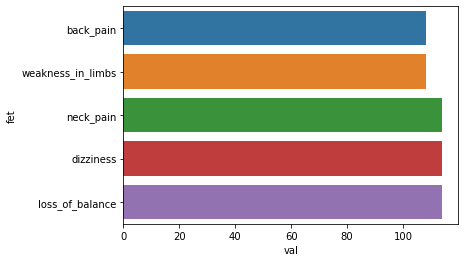

In [113]:
sns.barplot(data=data, x="val", y="fet")

### Paralysis (brain hemorrhage)

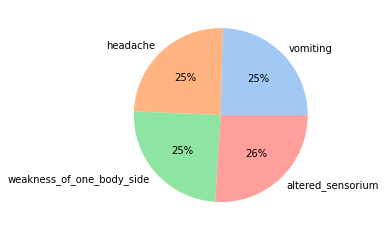

<AxesSubplot:ylabel='Density'>

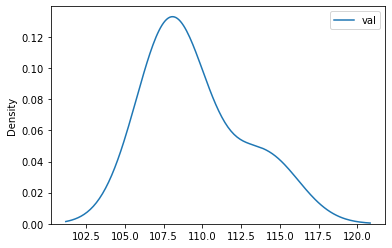

In [109]:
data = get_sub_dataframe(train, 'Paralysis (brain hemorrhage)')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.kdeplot(data=data)

### Jaundice

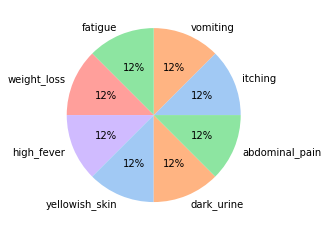

<AxesSubplot:xlabel='val', ylabel='fet'>

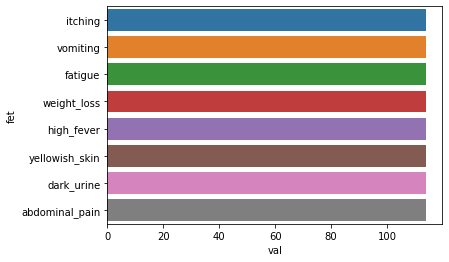

In [115]:
data = get_sub_dataframe(train, 'Jaundice')
fet = list(data['fet'])
val = list(data['val'])
plt.pie(val, labels = fet, colors = colors, autopct='%.0f%%')
plt.show()
sns.barplot(data=data, x="val", y="fet")

Text(0.5, 1.0, 'Multi-Collinearity of Features')

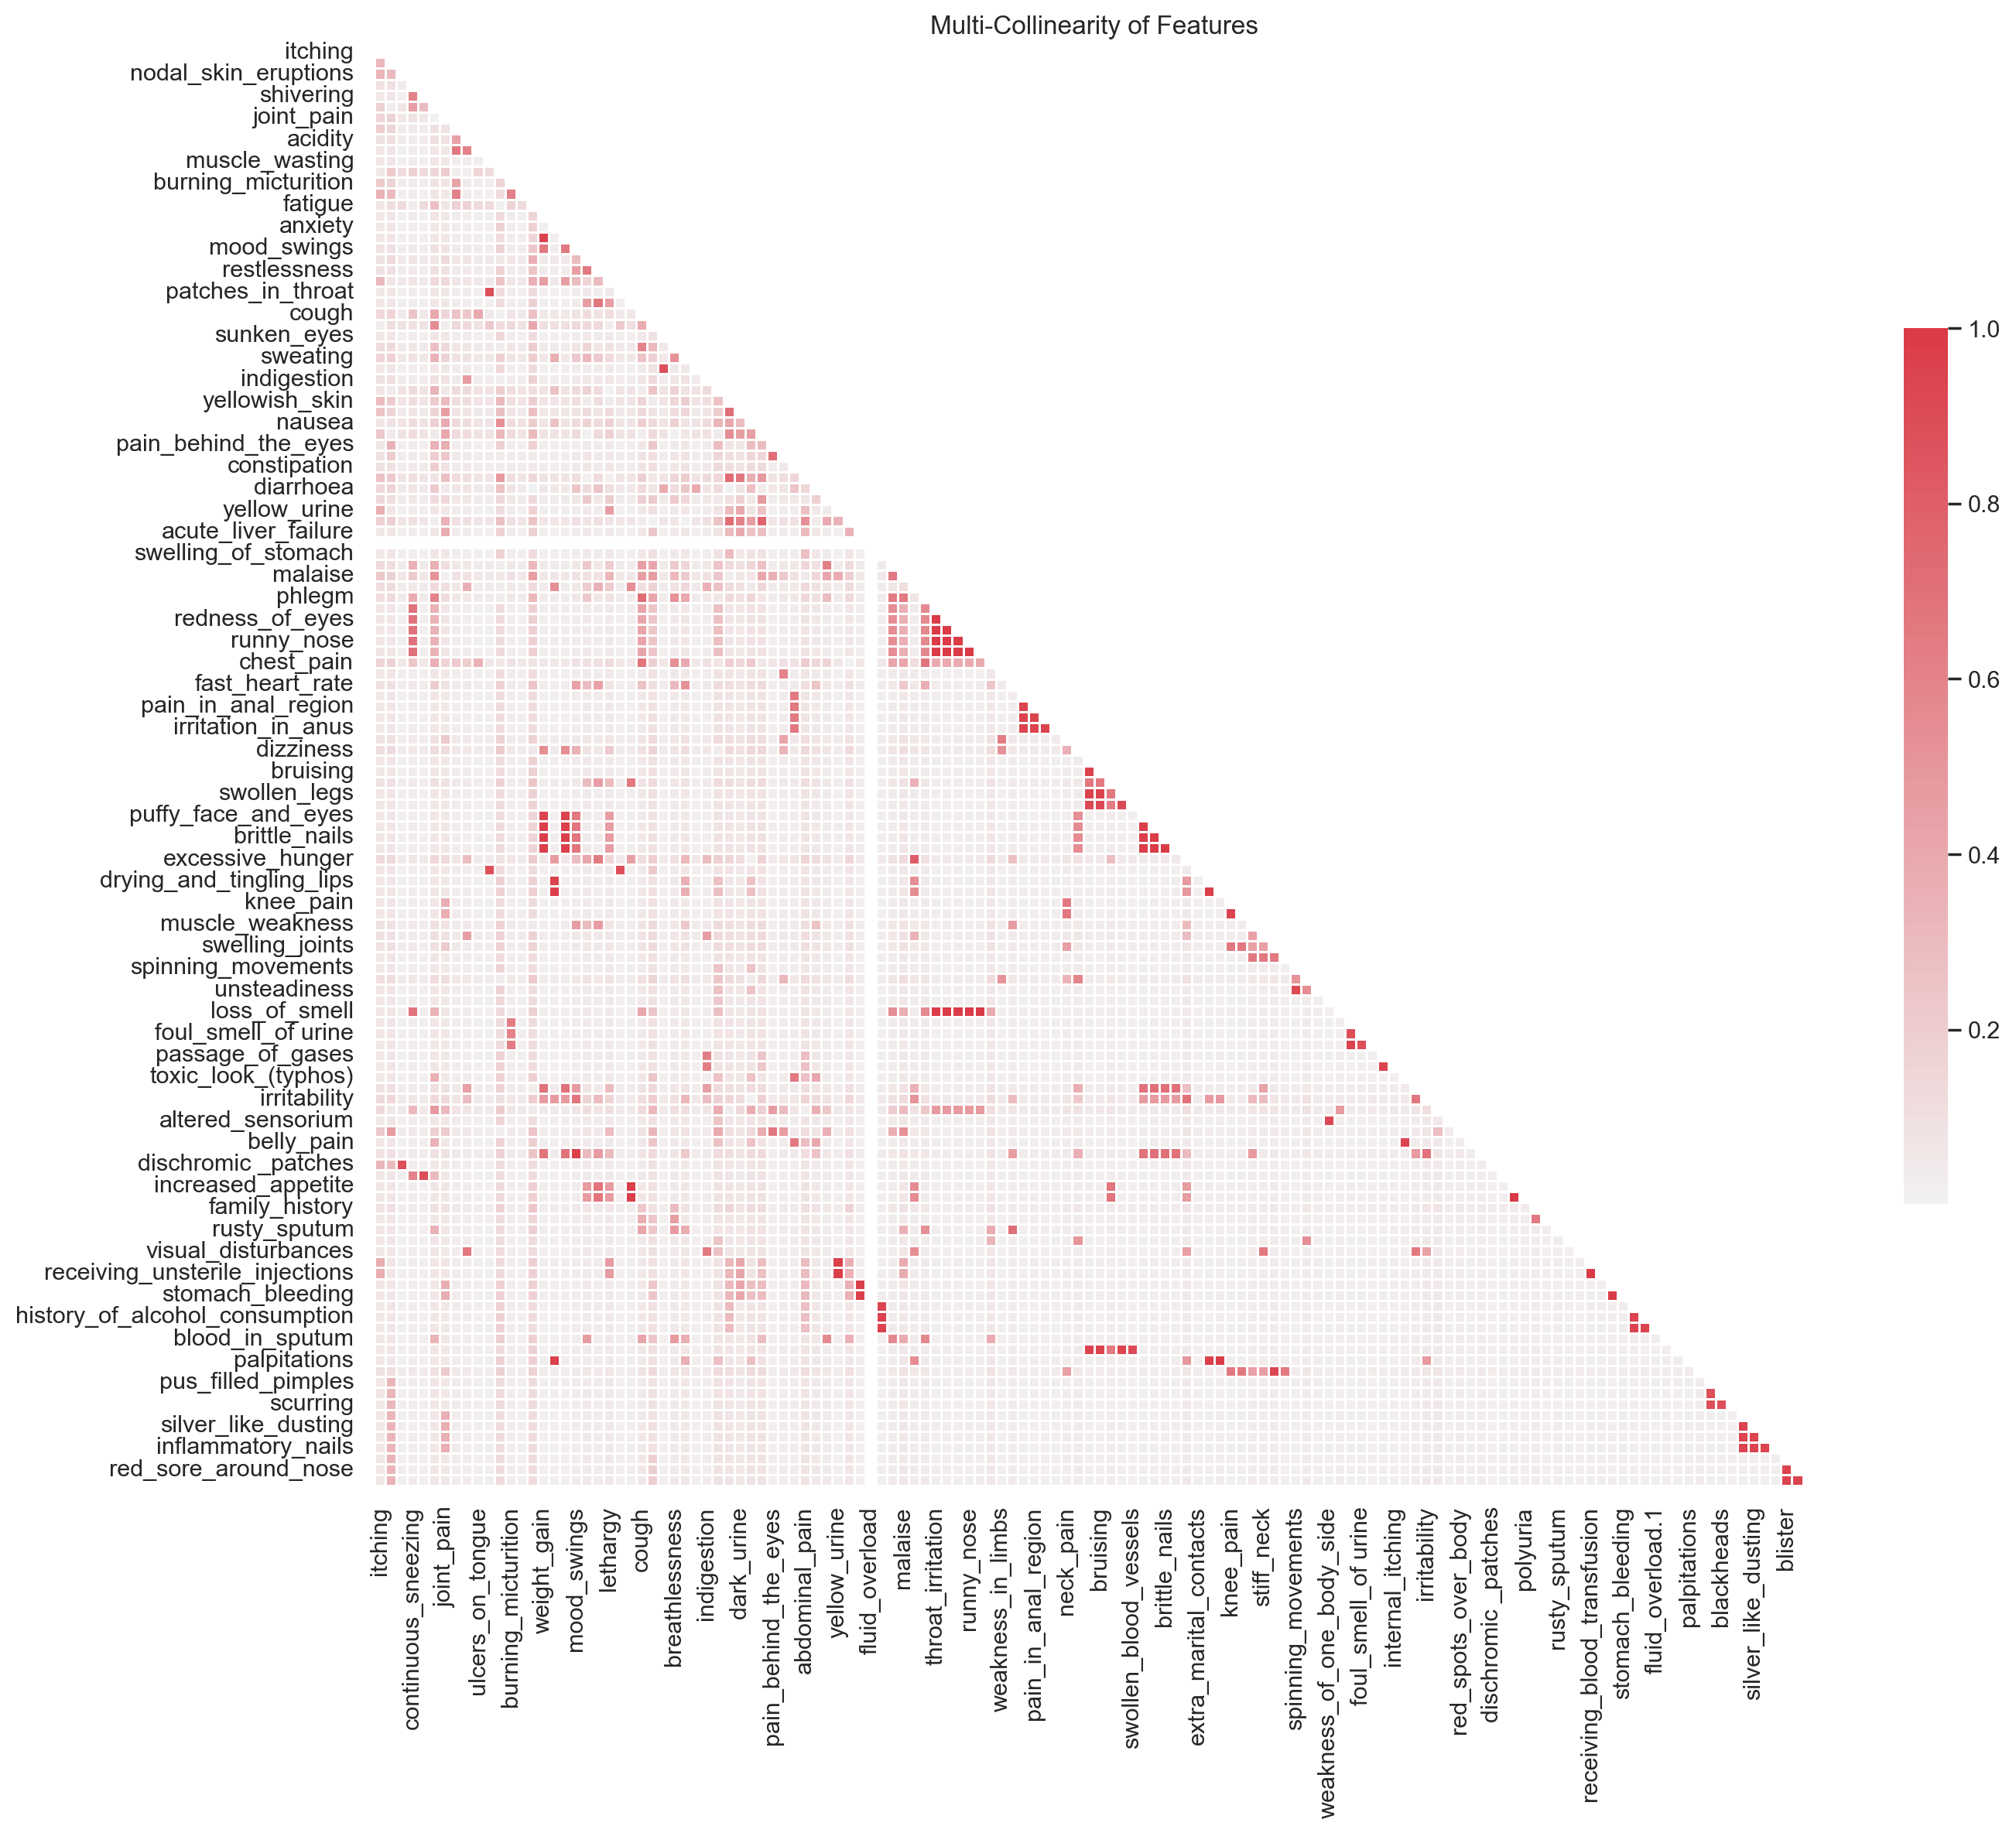

In [116]:
sns.set(style="white")
corr = train.corr().abs()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,15),dpi=200)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True,
linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')